# Basic Evaluation Metrics - Extended Examples
* Download [Anaconda with Python 3.6](https://www.anaconda.com/download) to install a nearly complete Python enviroment for data science projects
* Install [Keras: The Python Deep Learning Library](https://keras.io/) and other missing packages with the following command: ```conda install keras```
* Start your local Jupyter instance with ```jupyter notebook```

If you cannot see line numbers press ```Shift+L```to switch them on or check the ```View``` menu.

In [243]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

# the import statements load differnt Python packages that we need for the tutorial
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import matplotlib.pyplot as plt # a package for plotting
import matplotlib.axes as ax # a package for plotting
import seaborn as sns # a package for simple styling of the plots etc.
import numpy as np # a package for scientific computing
sns.set_style("whitegrid")
sns.set_context("notebook")

from math import log # import of the log function used later

In [244]:
# an array of document names (numbers are used to simplify programming)
documents=[1,2,3,4,5,6,7,8,9,10]
# the associated relevances, the indices of documents and relevances match! e.g. document 1 has relevance score 0
# relevance ranges from 0 (irrelevant) to 3 (highly relevant)
relevances=[0,1,2,3,2,0,0,0,0,3]

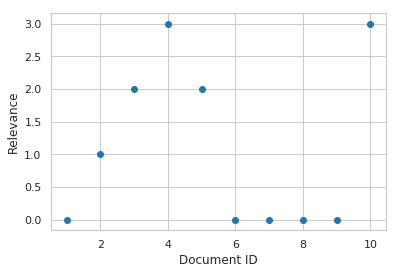

In [245]:
# create a plot of all documents to show their relevance
plt.xlabel("Document ID")
plt.ylabel("Relevance")
plt.scatter(x=documents,y=relevances)

## Precision, Recall and F-Score

In the next cell, we will define some functions that we will use for the calculation of
$$
Precision=\frac{|tp|}{|tp|+|fp|}\equiv\frac{|\mbox{relevant elements in result}|}{|\mbox{elements in result}|},
$$
$$
Recall=\frac{|tp|}{|tp|+|fn|}\equiv\frac{|\mbox{relevant elements in result}|}{|\mbox{relevant elements in collection}|}\mbox{, and}
$$
$$
F-score=\frac{2\cdot Precision\cdot Recall}{Precision+Recall}
$$.

In [246]:
# count the number of relevant documents in a result
# 'def' indicates a function
def relevantInResult(result):
    count=0
    for index in result:
        if relevances[index]>0:
            count+=1
    return count

# count the number of relevant documents in the collection
def relevantInCollection():
    count=0
    for relevance in relevances:
        if relevance>0:
            count+=1
    return count

Given a sample rank of documents 1, 2, 3, and 4, we will calculate the metrics.

In [247]:
# a sample rank, please note that you have to use indices to the documents array (see above)
resultIndices=[0,1,2,3]

order=""
for d in resultIndices:
    order+=str(documents[d])+";"
print("Result Order: "+order)

print("Number of relevant documents in the result: "+str(relevantInResult(resultIndices)))
precision=float(relevantInResult(resultIndices))/len(resultIndices)
print("Precision: %.2f"%precision)
recall=float(relevantInResult(resultIndices))/relevantInCollection()
print("Recall: %.2f"%recall)
fscore=2*precision*recall/(precision+recall)
print("F-score: %.2f"%fscore)

Result Order: 1;2;3;4;
Number of relevant documents in the result: 3
Precision: 0.75
Recall: 0.60
F-score: 0.67


If we add more documents to the rank, we will see how precision drops while recall stays the same. However, f-score indicates that the performance becomes weaker.

In [248]:
# a sample ranke, please note that you have to use indices to the documents array (see above)
resultIndices=[0,1,2,3,5,6,7]

order=""
for d in resultIndices:
    order+=str(documents[d])+";"
print("Result Order: "+order)

print("Number of relevant documents in the result: "+str(relevantInResult(resultIndices)))
precision=float(relevantInResult(resultIndices))/len(resultIndices)
print("Precision: %.2f"%precision)
recall=float(relevantInResult(resultIndices))/relevantInCollection()
print("Recall: %.2f"%recall)
fscore=2*precision*recall/(precision+recall)
print("F-score: %.2f"%fscore)

Result Order: 1;2;3;4;6;7;8;
Number of relevant documents in the result: 3
Precision: 0.43
Recall: 0.60
F-score: 0.50


If our rank contains less relevant documents, we will see how precicision and recall decrease.

In [249]:
# a sample rank, please note that you have to use indices to the documents array (see above)
resultIndices=[0,1,2,5]

order=""
for d in resultIndices:
    order+=str(documents[d])+";"
print("Result Order: "+order)

print("Number of relevant documents in the result: "+str(relevantInResult(resultIndices)))
precision=float(relevantInResult(resultIndices))/len(resultIndices)
print("Precision: %.2f"%precision)
recall=float(relevantInResult(resultIndices))/relevantInCollection()
print("Recall: %.2f"%recall)
fscore=2*precision*recall/(precision+recall)
print("F-score: %.2f"%fscore)

Result Order: 1;2;3;6;
Number of relevant documents in the result: 2
Precision: 0.50
Recall: 0.40
F-score: 0.44


In [250]:
resultIndices=[0,1,2,5,7]

order=""
for d in resultIndices:
    order+=str(documents[d])+";"
print("Result Order: "+order)

print("Number of relevant documents in the result: "+str(relevantInResult(resultIndices)))
precision=float(relevantInResult(resultIndices))/len(resultIndices)
print("Precision: %.2f"%precision)
recall=float(relevantInResult(resultIndices))/relevantInCollection()
print("Recall: %.2f"%recall)
fscore=2*precision*recall/(precision+recall)
print("F-score: %.2f"%fscore)

Result Order: 1;2;3;6;8;
Number of relevant documents in the result: 2
Precision: 0.40
Recall: 0.40
F-score: 0.40


In [251]:
resultIndices=[0,1,2,5,7,8]

order=""
for d in resultIndices:
    order+=str(documents[d])+";"
print("Result Order: "+order)

print("Number of relevant documents in the result: "+str(relevantInResult(resultIndices)))
precision=float(relevantInResult(resultIndices))/len(resultIndices)
print("Precision: %.2f"%precision)
recall=float(relevantInResult(resultIndices))/relevantInCollection()
print("Recall: %.2f"%recall)
fscore=2*precision*recall/(precision+recall)
print("F-score: %.2f"%fscore)

Result Order: 1;2;3;6;8;9;
Number of relevant documents in the result: 2
Precision: 0.33
Recall: 0.40
F-score: 0.36


## nDCG – A More Advanced Metric

The next cell prepares functions to calculate 

$$
CG[i]=\begin{cases} G[1], & \mbox{if } i=1 \\ CG[i-1] + G[i], & \mbox{ otherwise.}\end{cases},
$$
$$
DCG[i]=\begin{cases} CG[i], & \mbox{if } i<b \\ DCG[i-1] + \frac{G[i]}{\log_{b}i}, & \mbox{if } i\geq b.\end{cases}, \mbox{and}
$$
$$
nDCG[i]=\frac{DCG[i]}{iGV[i]}
$$.

Additionally, it prepares a function for visualizing the results.

In [252]:
# the indices refer to the relevances array (see above)
# the ideal rank indices are the documents sorted by decreasing relevance
idealRankIndices=[3,9,2,4,1,0,5,6,7,8]

# compute the cummulative gain of a result
def calculateCG(result):
    cg=0
    for index in result:
        cg+=relevances[index]
    return cg

# compute the discounted cummulative gain of a result
def calculateDCG(result):
    dcg=0
    pos=0
    logbase=2
    for index in result:
        if pos>=logbase:
            dcg+=relevances[index]/log(pos,logbase)
            pos+=1
        else:
            pos+=1
            dcg+=relevances[index]
    return dcg

# compute the normalized cummulative gain of a result
def calculateNDCG(result,idealRank):
    sampledcg=calculateDCG(result)
    idealdcg=calculateDCG(idealRank)
    return sampledcg/idealdcg

# visualize the results
def visualizeResults(resultIndices):
    order=""
    relHist=[0] # we initialize the array with a leading 0 as a quick fix for the barchart plot below
    relDeco=[]
    for d in resultIndices:
        order+=str(documents[d])+" ("+str(relevances[d])+"); "
        relHist.append(relevances[d])
        if relevances[d]>0:
            relDeco.append("+")
        else:
            relDeco.append("0")
    print("Result Order: "+order)

    print("CG for rank with %i results: %.3f"%(len(resultIndices),calculateCG(resultIndices)))
    print("DCG for rank with %i results: %.3f"%(len(resultIndices),calculateDCG(resultIndices)))
    print("nDCG for rank with %i results: %.3f"%(len(resultIndices),calculateNDCG(resultIndices,idealRankIndices)))
    print("Number of relevant documents in the result: "+str(relevantInResult(resultIndices)))


    plt.xlabel("Rank of document with relevance...")
    plt.ylabel("Relevance")
    plt.yticks([0,1,2,3])
    plt.xlim(0,len(resultIndices)+1)
    
    #plt.plot(relHist,'*')
    plt.bar(np.arange(0, len(resultIndices)+1),relHist)

    plt.savefig("test.pdf",format="pdf")
    plt.show()

Now we demonstrate the impact of different result ranks on the different metrics.

The sample clearly illustrates that DCG penalizes lately retrieved relevant documents while CG only sums up the relevance scores.

Result Order: 1 (0); 2 (1); 3 (2); 6 (0); 8 (0); 9 (0); 10 (3); 
CG for rank with 7 results: 6.000
DCG for rank with 7 results: 4.161
nDCG for rank with 7 results: 0.426
Number of relevant documents in the result: 3


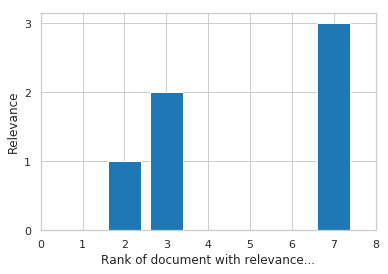

In [253]:
resultIndices=[0,1,2,5,7,8,9]

visualizeResults(resultIndices)

Result Order: 1 (0); 2 (1); 3 (2); 6 (0); 8 (0); 9 (0); 10 (3); 5 (2); 
CG for rank with 8 results: 8.000
DCG for rank with 8 results: 4.873
nDCG for rank with 8 results: 0.499
Number of relevant documents in the result: 4


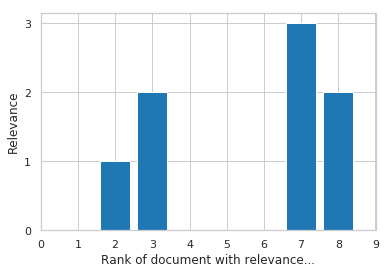

In [254]:
resultIndices=[0,1,2,5,7,8,9,4]

visualizeResults(resultIndices)

Result Order: 1 (0); 2 (1); 3 (2); 6 (0); 8 (0); 9 (0); 5 (2); 10 (3); 
CG for rank with 8 results: 8.000
DCG for rank with 8 results: 4.842
nDCG for rank with 8 results: 0.496
Number of relevant documents in the result: 4


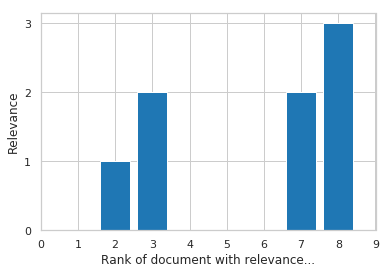

In [255]:
resultIndices=[0,1,2,5,7,8,4,9]

visualizeResults(resultIndices)